## План выполнения работ

#### План работы:  
- Загрузить данные:
    - Изучить данные
    - Сделать описание изученных данных
    - Выявить ошибки в данных
- Провести исследовательский анализ данных:
    - Посмотреть на распределение исходных данных
    - Избавиться от ошибок в данных
- Подобрать признаки, на которых будет обучаться модель:
    - Сгенерировать ряд признаков
    - Проверить признаки на мультиколлинеарность, исключить лишние
- Построить модель, которая предскажет температуру стали:
    - Сформировать обучающую, валидационную и тестовую выборки
    - Провести масштабирование признаков 
    - Выбрать несколько моделей и проверить их эффективность на тренировочной выборке с помощью показателя эффективности MAE
    - Проанализировать результаты и выбрать лучшую модель
    - Эффективность лучшей модели проверить на тестовой выборке
- Написать отчет по выполненой работе    

## Загрузка и изучение данных

In [1]:
import pandas as pd
from termcolor import colored, cprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
from catboost import CatBoostRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = {
    'data_arc.csv' : 'red', 
    'data_bulk_time.csv' : 'magenta', 
    'data_bulk.csv' : 'green', 
    'data_gas.csv' : 'yellow', 
    'data_temp.csv' : 'blue', 
    'data_wire_time.csv' : 'grey', 
    'data_wire.csv' : 'cyan'
}

def tables_form(path):
    df = pd.read_csv('final_steel/' + path)
    return df

def tables_praktikum_form(link, path):
    df = pd.read_csv(link + 'final_steel/' + path)
    return df

link = '/datasets/'

In [4]:
try: 
    for i in paths:
        cprint(i, paths[i] , attrs=["reverse"]), display(tables_form(i).head()), display(tables_form(i).info())
except:
    for i in paths:
        cprint(i, paths[i] , attrs=["reverse"]), display(tables_praktikum_form(link, i).head()), display(tables_praktikum_form(link, i).info())

data_arc.csv


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

data_bulk_time.csv


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

data_bulk.csv


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

data_gas.csv


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

data_temp.csv


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

data_wire_time.csv


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

data_wire.csv


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. Будем объединять по нему. Во всех данных есть пропуски. Таблица `data_temp.csv` содержит целевой признак. По ней и будем объединять данные, значит, в этой таблице смело удалим пропуски. Также пропуски есть в `data_bulk.csv` и `data_wire.csv`. В них информация указывает на то, использовались ли эти материалы в процессе. На месте **NaN** поставим **0**, потому что так не исказится результат. В остальных таблицах обрабатывать пропущенные значения не нужно, потому что они и так сократятся при объединении. 

##### Вывод

Из 7 датасетов будем использовать только **5**, в которых проведем предобработку и из которых сформируем признаки. В выборку не войдут `data_bulk_time.csv` и `data_wire_time.csv`. Необходимо построить графики по таблицам, чтобы проверить данные на адекватность. Также изучим корреляцию. Во всех датасетах есть пропуски - обработаем их. Приведем время в таблице `data_arc.csv` к формату datetime, чтобы извлечь нужную информацию. Произведем необходимые расчеты. При объединии таблиц поняем названия колонок для удобства. 

### Исследование данных

#### Математическое описание 

Создадим датасеты. 

In [5]:
try:
    data_arc = tables_praktikum_form(link,'data_arc.csv').rename(columns={'Начало нагрева дугой' : 'first_heat',
                                        'Конец нагрева дугой' : 'last_heat',
                                        'Активная мощность' : 'active_power',
                                        'Реактивная мощность' : 'reactive_power'})

    data_temp = tables_praktikum_form(link,'data_temp.csv').rename(columns={'Время замера' : 'time',
                                                             'Температура' : 'temp'})
    data_bulk = tables_praktikum_form(link,'data_bulk.csv')
    data_gas = tables_praktikum_form(link,'data_gas.csv').rename(columns={'Газ 1' : 'gas'})
    data_wire = tables_praktikum_form(link,'data_wire.csv')
except:
    data_arc = tables_form('data_arc.csv').rename(columns={'Начало нагрева дугой' : 'first_heat',
                                        'Конец нагрева дугой' : 'last_heat',
                                        'Активная мощность' : 'active_power',
                                        'Реактивная мощность' : 'reactive_power'})

    data_temp = tables_form('data_temp.csv').rename(columns={'Время замера' : 'time',
                                                             'Температура' : 'temp'})
    data_bulk = tables_form('data_bulk.csv')
    data_gas = tables_form('data_gas.csv').rename(columns={'Газ 1' : 'gas'})
    data_wire = tables_form('data_wire.csv')
    

dfs = [data_arc, data_temp, data_bulk, data_gas, data_wire]

Для начала сделаем математическое описание данных. Это даст первое представление в цифрах об аномалиях. 

In [6]:
paths_to_check = {
    'data_arc.csv' : 'red', 
    'data_bulk.csv' : 'green', 
    'data_gas.csv' : 'yellow', 
    'data_temp.csv' : 'blue', 
    'data_wire.csv' : 'cyan'
}


try:
    for i in paths_to_check:
        cprint(i, paths[i] , attrs=["reverse"]), display(tables_form(i).describe())
except:
    for i in paths_to_check:
        cprint(i, paths[i] , attrs=["reverse"]), display(tables_praktikum_form(link, i).describe())

data_arc.csv


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


data_bulk.csv


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


data_gas.csv


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


data_temp.csv


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


data_wire.csv


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Сразу видим, что выбивается значение в `data_arc.csv` - минимальное значение реактивной мощности -715.5, что противоречит норме, мощность не может быть отрицательной. 1 и 3 квантили соотвественно показывают 0.29 и 0.63. Стандартное отклонение в равно 5.8, среднее 0.45, медиана 0.41. Данные должны быть распределены нормально. 

В таблицах `data_bulk.csv`, `data_temp.csv`, `data_wire.csv` на первый взгляд все нормально.

В `data_gas.csv` минимальное значение 0.008, тогда как первый квантиль 7.04 - нужно посмотреть. 

#### Построение графиков 

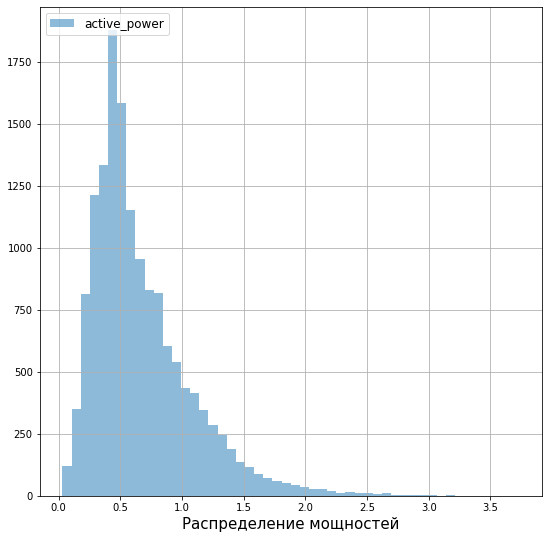

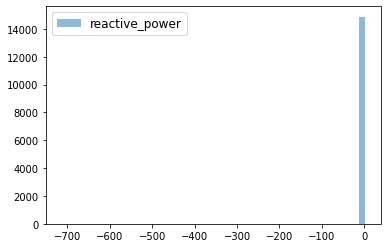

In [7]:
def build_hist(df, columns, title):
    plt.figure(figsize=[9, 9])
    plt.grid(visible=True)
    plt.xlabel(title, fontsize=15)
    for column in columns:
        plt.hist(df[column], label=column, bins = 50, alpha=.5)
        plt.legend(loc='upper left', fontsize=12)    
        plt.show()


build_hist(data_arc, data_arc.columns[3:], 'Распределение мощностей') 

В распределении мощностей очевидно есть выбросы, но, как указывалось ранее, экстремальный выброс находится на отметке, первышающей -700. Все, что ниже 0, удалим.

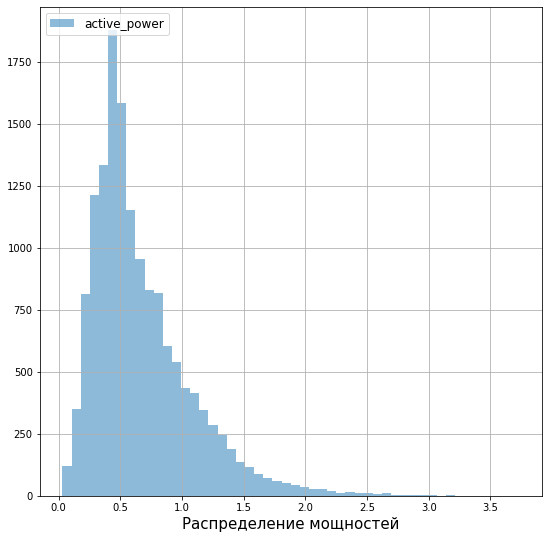

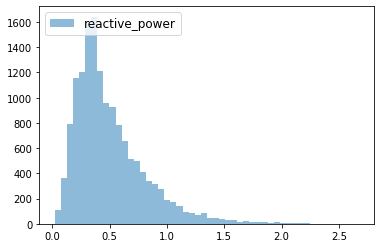

,key,active_power,reactive_power
count,14875.000000,14875.000000,14875.000000
mean,1615.186756,0.670453,0.500723
std,934.593897,0.408170,0.310880
min,1.000000,0.030002,0.020806
25%,806.000000,0.395295,0.291003
50%,1617.000000,0.555565,0.415984
75%,2429.000000,0.857049,0.637403
max,3241.000000,3.731596,2.676388


In [8]:
data_arc = data_arc.query('reactive_power >= 0')
build_hist(data_arc, data_arc.columns[3:], 'Распределение мощностей') 
data_arc.describe()

Теперь перейдем к газу. 

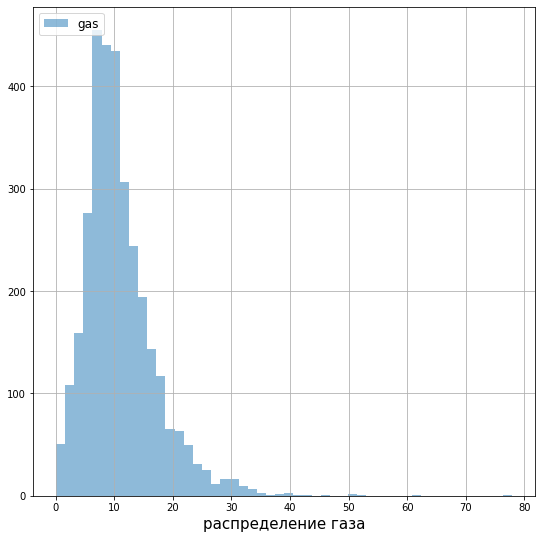

In [9]:
build_hist(data_gas, data_gas.drop('key', axis=1).columns, 'распределение газа')

Видим, что есть выбросы после 40, однако они не экстремальные - оставляем как есть.

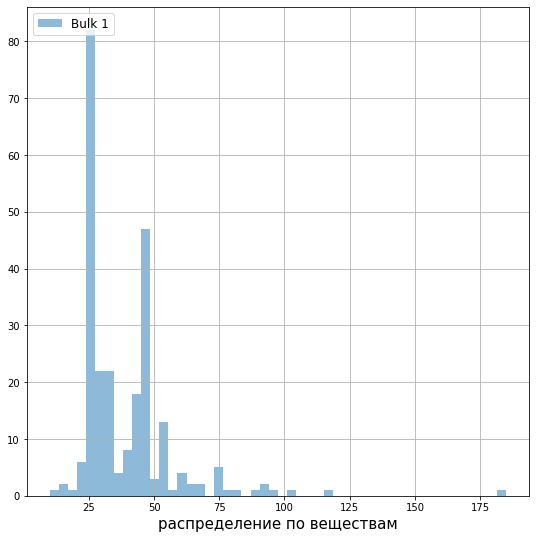

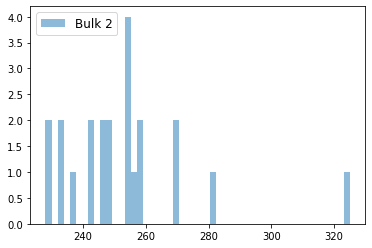

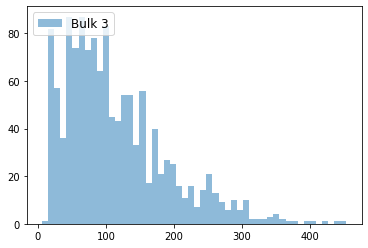

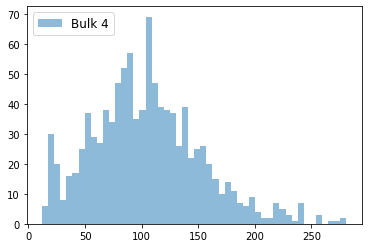

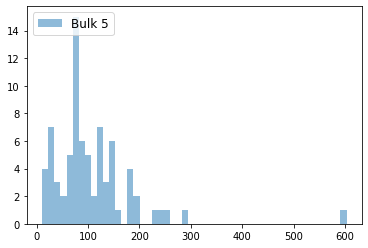

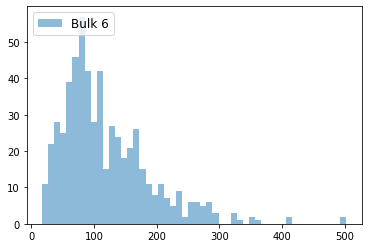

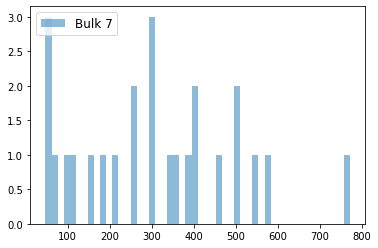

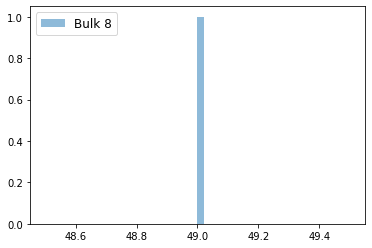

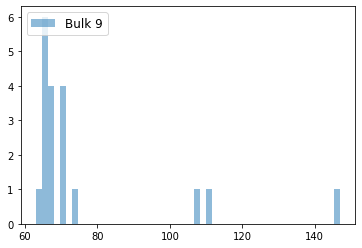

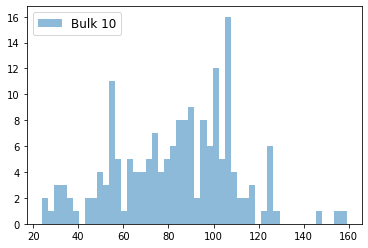

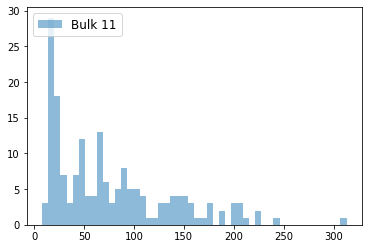

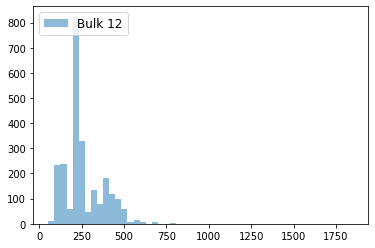

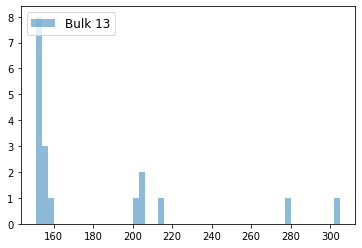

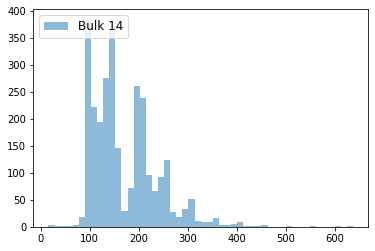

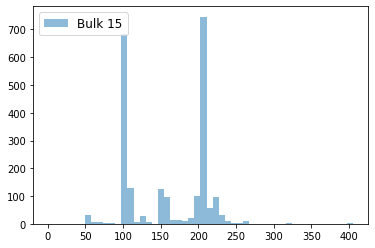

In [10]:
build_hist(data_bulk, data_bulk.drop('key', axis=1).columns, 'распределение по веществам')

Видим выбивающиеся значения после 500 и выше. Оставим их.

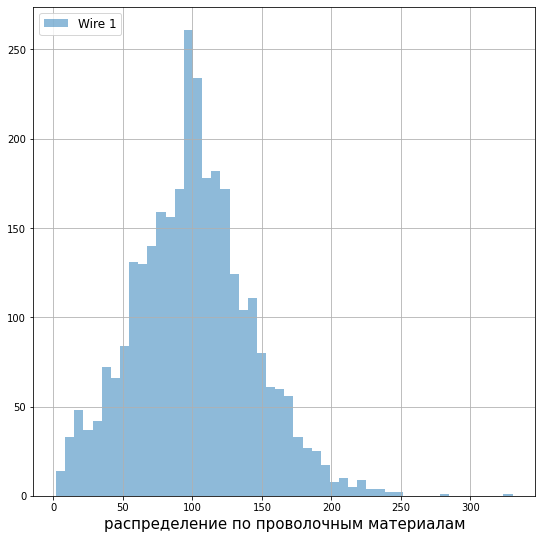

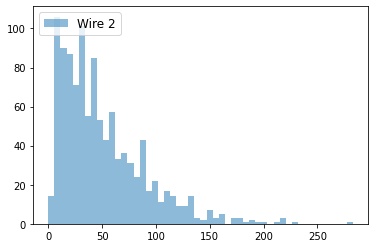

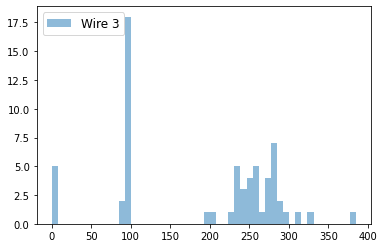

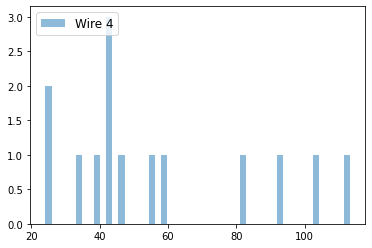

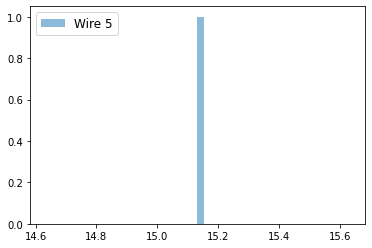

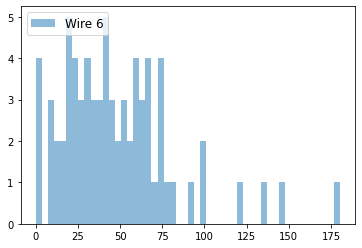

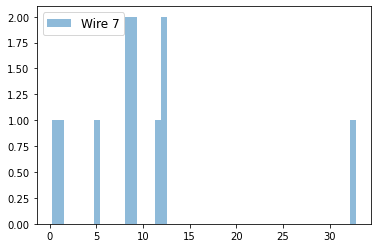

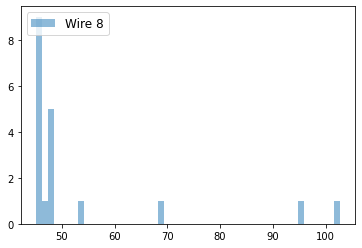

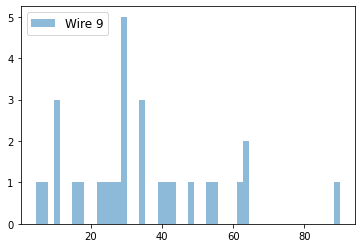

In [11]:
build_hist(data_wire, data_wire.drop('key', axis=1).columns, 'распределение по проволочным материалам')

В этой таблице выбивающиеся значения не критичны. 

#####  Вывод

Посмотрели на выбивающиеся значения, некоторые убрали. 

### Предобработка

#### Обработка пропусков

In [12]:
data_bulk = data_bulk.fillna(0)
data_wire = data_wire.fillna(0)

isna = data_temp['temp'].isna()
key_delete = data_temp.query('@isna == True')['key'].unique()
data_temp = data_temp.query('key not in @key_delete')

### Подготовка таблицы признаков

#### Расчет средних активной и реактивных мощностей

In [13]:
pivot_arc = data_arc.pivot_table(index = ['key'])

#### Расчет целевого признака

In [14]:
last_time = data_temp.groupby('key').agg({'temp': 'last'})

last_time['first_temp'] = data_temp.groupby('key').agg({'temp': 'first'})

#### Объединение таблиц

In [15]:
final_df = (last_time
.merge(data_gas, on='key', how='inner')
.merge(data_wire, on='key', how='inner')
.merge(data_bulk, on='key', how='inner')
.merge(pivot_arc, on='key', how='inner'))
final_df.columns = final_df.columns.str.lower()


# уберем номер партии из таблицы - он заменит индекс
final_df.drop('key', axis=1, inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            2329 non-null   float64
 1   first_temp      2329 non-null   float64
 2   gas             2329 non-null   float64
 3   wire 1          2329 non-null   float64
 4   wire 2          2329 non-null   float64
 5   wire 3          2329 non-null   float64
 6   wire 4          2329 non-null   float64
 7   wire 5          2329 non-null   float64
 8   wire 6          2329 non-null   float64
 9   wire 7          2329 non-null   float64
 10  wire 8          2329 non-null   float64
 11  wire 9          2329 non-null   float64
 12  bulk 1          2329 non-null   float64
 13  bulk 2          2329 non-null   float64
 14  bulk 3          2329 non-null   float64
 15  bulk 4          2329 non-null   float64
 16  bulk 5          2329 non-null   float64
 17  bulk 6          2329 non-null   f

#### Анализ на мультиколлинеарность 

Посмотрим на корреляцию значений между собой. Это нужно сделать для того, чтобы обучение линейной регрессии и других моделей прошло успешно. Если вдруг обнаружатся пары, где значения между сосбой коррелируют на 0.9 и выше - удалим их. 

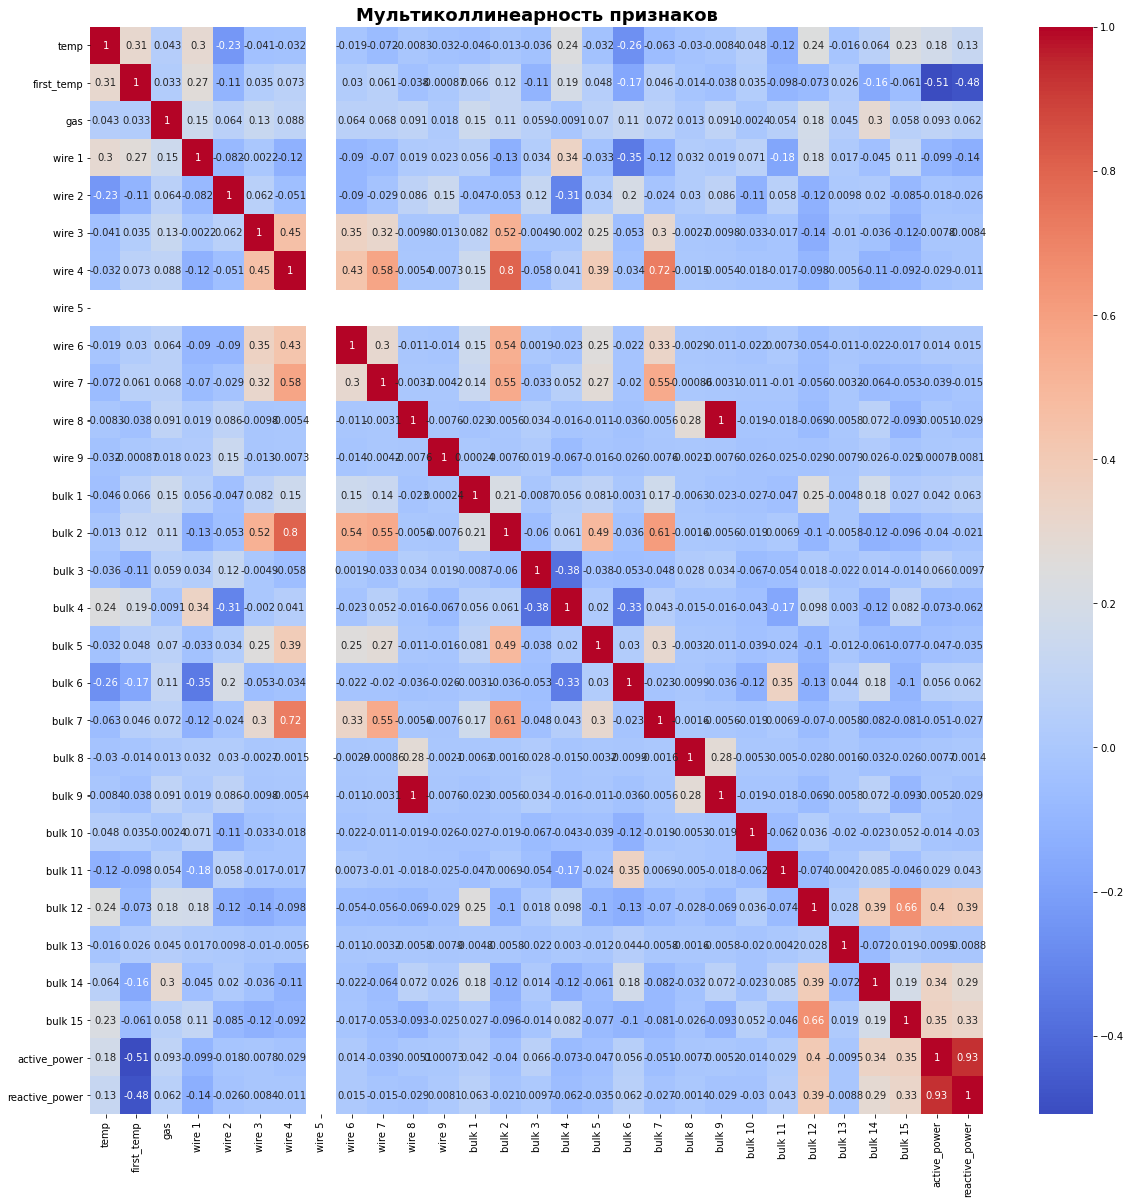

In [16]:
temp_corr=final_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(final_df.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.title("Мультиколлинеарность признаков", weight='bold', fontsize=18)
plt.show()

Обнаружено несколько признаков, имеющих коэффицент мультиколлинеарности выше 0.9 - из выделим reactive_power и wire 8. Также замечен пустой признак wire 5. При обучении линейной регресссии данные признаки будут удалены из выборки.

##### Вывод

Провели исследовательский анализ данных: посмотрели на выбивающиеся значения, слишком выбивающиеся удалили. Также построение графиков показало, что данные распределены **ненормально**. Затем провели предобработку данных, в которой изавились от пропусков. Далее рассчитали по формуле полную мощность и определили целевой признак. Сформировали финальную таблицу с признаками, которые проверили на мультиколлинеарность: топ-5 признаков, коррелирующих с целевым - **wire 1**, **bulk 12**, **bulk 15**, **first_temp**, **active_power**. Перейдем к обучению моделей. 

## Машинное обучение

### Формирование выборок

In [17]:
# делаем разбиение на выборки
features = final_df.drop(['temp'], axis=1)
target = final_df['temp']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=311022)
# масштабируем признаки
scaler= StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# формируем отдельную выборку для линейной регрессии
df_lr = final_df.drop(['bulk 9', 'wire 5', 'reactive_power'], axis=1)
features_lr = df_lr.drop(['temp'], axis=1)
target_lr = df_lr['temp']

features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(features_lr,
                                                    target_lr,
                                                    test_size=0.25,
                                                    random_state=311022)

features_train_lr = scaler.fit_transform(features_train_lr)
features_test_lr = scaler.transform(features_test_lr)

Проверим данные для Линейной регрессии. 

In [18]:
df_lr

,temp,first_temp,gas,wire 1,wire 2,wire 3,wire 4,wire 6,wire 7,wire 8,...,bulk 6,bulk 7,bulk 8,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15,active_power
0,1613.0,1571.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,0.975629
1,1602.0,1581.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,0.763150
2,1599.0,1596.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,0.505176
3,1625.0,1601.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,0.802313
4,1602.0,1576.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,0.836793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,1591.0,1570.0,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0,0.802673
2325,1591.0,1554.0,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0,0.700511
2326,1589.0,1571.0,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0,0.737460
2327,1594.0,1591.0,14.953657,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0,0.681745


Text(0.5, 1.0, 'Мультиколлинеарность для линейной регрессии')

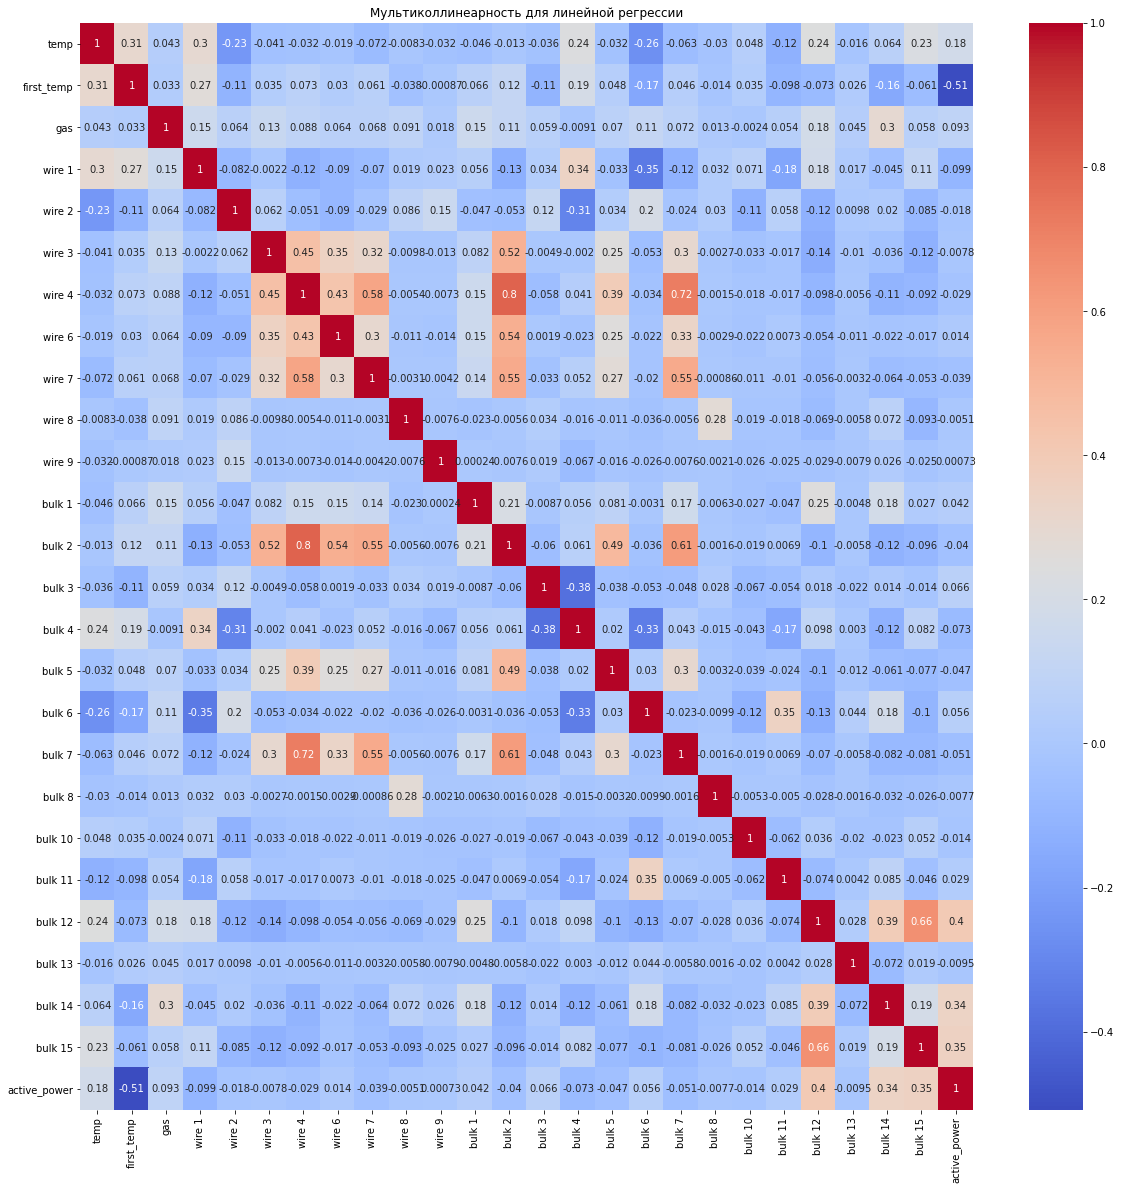

In [19]:
temp_corr=final_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(df_lr.corr(method='spearman'), annot = True, cmap="coolwarm")
plt.title("Мультиколлинеарность для линейной регрессии")

### Обучение моделей

In [30]:
def model_building(model, features, target):
    model = model
    cross_score = -cross_val_score(model, features, target, scoring = 'neg_mean_absolute_error',cv=5).mean()
    return print(model, 'MAE =', cross_score)

def param_search(model, params):
    model = model
    RSCV = RandomizedSearchCV(model, params, scoring = 'neg_mean_absolute_error')
    RSCV.fit(features_train, target_train)
    score = RSCV.best_score_
    print('Параметры - ', RSCV.best_params_)
    print('    MAE {:.2f} %'.format(-score))

In [37]:
model_building(LinearRegression(), features_train_lr, target_train_lr)
model_building(RandomForestRegressor(random_state=311022), features_train, target_train)
model_building(CatBoostRegressor(silent = True), features_train, target_train)

LinearRegression() MAE = 7.061968053193996
RandomForestRegressor(random_state=311022) MAE = 6.775168088415883
<catboost.core.CatBoostRegressor object at 0x7f573fa56d30> MAE = 6.627345453354477


Лучший результат без подбора параметров показывает модель CatBoost. 

### Подбор параметров 

In [1]:
rfr_params = {
 'ccp_alpha': [0.05, 0.01],
 'max_depth' : [6,7,8,9],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [50, 70, 90, 110],
 'n_jobs': [1, -1],
 'warm_start': [True, False],
 'oob_score': [True, False]}

catboost_params = {'iterations' :[20, 30, 35],
        'depth':[1, 3, 5]}

In [53]:
%%time
param_search(CatBoostRegressor(random_seed=311022,
        silent=True), catboost_params)

Параметры -  {'silent': True, 'random_seed': 311022, 'iterations': 30, 'depth': 3}
    MAE 6.75 %
CPU times: user 2.04 s, sys: 226 ms, total: 2.26 s
Wall time: 24.4 s


In [47]:
%%time
model_building(LinearRegression(), features_train_lr, target_train_lr)

LinearRegression() MAE = 7.061968053193996
CPU times: user 18.6 ms, sys: 91.3 ms, total: 110 ms
Wall time: 58.5 ms


In [54]:
%%time
param_search(RandomForestRegressor(random_state=311022, bootstrap=True), rfr_params)

Параметры -  {'warm_start': False, 'random_state': 311022, 'oob_score': False, 'n_jobs': -1, 'n_estimators': 90, 'max_features': 'auto', 'max_depth': 8, 'ccp_alpha': 0.01, 'bootstrap': True}
    MAE 6.75 %
CPU times: user 12.9 s, sys: 65.1 ms, total: 12.9 s
Wall time: 12.9 s


Получили результаты с подбором гиперпараметров - сделаем их нагляднее. 

### Выводы по обучению

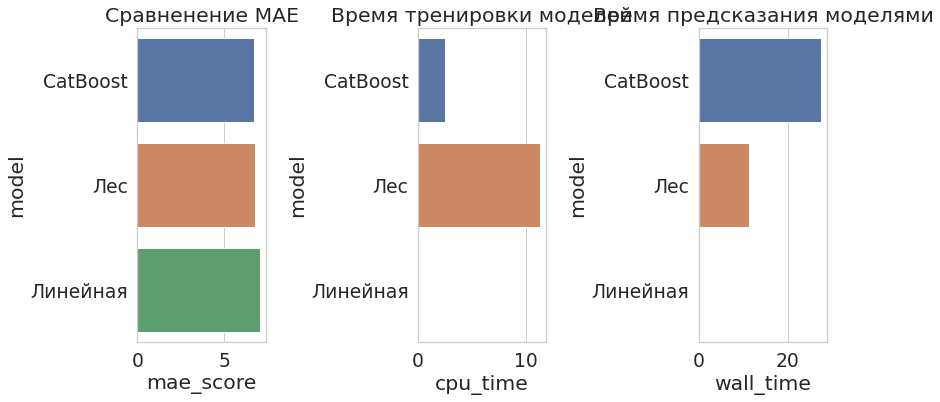

In [49]:
models = ["CatBoost", "Линейная", "Лес"]
mae_score = [6.75, 7.06,  6.76]
cpu_time = [2.26, 0.11, 12.9]
wall_time = [24.4, 0.058, 12.9]

comparison = pd.DataFrame(
    data=zip(models, mae_score, cpu_time, wall_time),
    columns=["model", "mae_score", "cpu_time", "wall_time"],
)


fig, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.set_style("whitegrid")


sns.barplot(
    data=comparison.sort_values("mae_score"),
    y="model",
    x="mae_score",
    orient="h",
    ax=ax[0],
)
ax[0].set_title("Сравненение MAE")
sns.barplot(
    data=comparison.sort_values("mae_score"),
    y="model",
    x="cpu_time",
    orient="h",
    ax=ax[1],
)
ax[1].set_title("Время тренировки моделей")
sns.barplot(
    data=comparison.sort_values("mae_score"),
    y="model",
    x="wall_time",
    orient="h",
    ax=ax[2],
)
ax[2].set_title("Время предсказания моделями")


plt.tight_layout()
plt.show()

Лучшими по метрике MAE оказались "Случайный лес" и "CatBoost", однако быстрее решает задачу первая модель, поэтому для нее будем смотреть, какие признаки были основными при определнии целевого. 

### Анализ признаков 

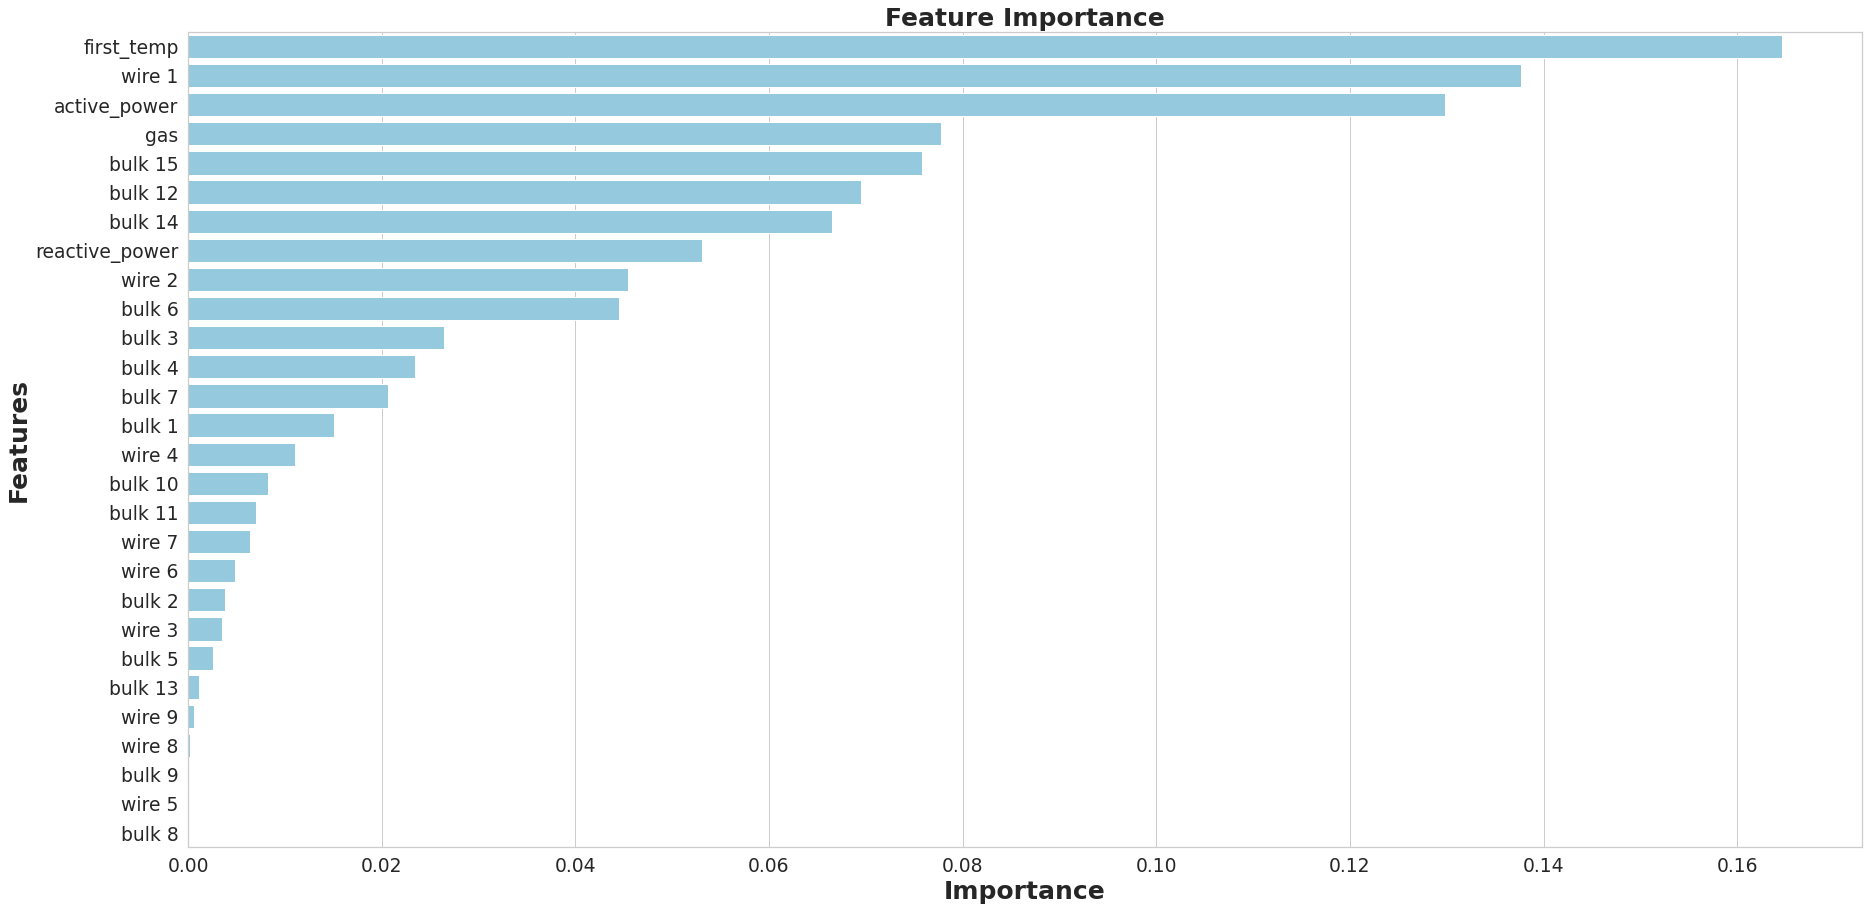

None

,Features,Gini-Importance
0,first_temp,0.164668
1,wire 1,0.137706
2,active_power,0.129834
3,gas,0.077806
4,bulk 15,0.075802
5,bulk 12,0.069490
6,bulk 14,0.066458
7,reactive_power,0.053062
8,wire 2,0.045460
9,bulk 6,0.044493


In [55]:
rfr_1 = RandomForestRegressor()
rfr_1.fit(features_train, target_train)
feats = {}
for feature, importance in zip(features.columns, rfr_1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

По результатм исследования самыми влиятельными по убыванию признаками оказались: 
* first_temp(первая температура)
* wire 1 
* active_power(активная мощность) 
* gas 
* bulk 15
* bulk 14
* bulk 12
* full_power(полная мощность)
* wire 2
* bulk 6
* reactive_power(реактивная мощность)

Эти приказатели пригодятся бизнесу при решении проблемы сокращения электроэнергии. 

### Тестирование лучшей модели

Проверим модель с лучшим показателем функции ошибки на ранее сформированной тестовой выборке.

In [56]:
rfr = RandomForestRegressor(warm_start= True, random_state= 311022, n_jobs= -1, n_estimators= 90, max_features= 'auto', max_depth = 8, ccp_alpha= 0.01, oob_score= False, bootstrap= True)
rfr.fit(features_train, target_train)
mae_test = rfr.predict(features_test)
print(rfr, 'MAE =', mae(target_test, mae_test))

RandomForestRegressor(ccp_alpha=0.01, max_depth=8, n_estimators=90, n_jobs=-1,
                      random_state=311022, warm_start=True) MAE = 6.783399778040002


Получили показание MAE **6.78**. 

## Отчет

#### Решаемая задача:

Исследовательской задачей было построение модели, которая предскажет температуру стали на этапе плавления. 

#### Описание решения:

Для успешного выполнения важным этапом были подготовка и обработка исходных данных. На этом этапе данные были загружены и подробно изучены , стало понятно, какие данные следует удалить из таблицы, также выявлены ошибки. Был проведен исследовательский анализ, с помощью которого определены выбивающиеся значения, а также получена информация о распределении данных. Ошибки обработаны без искажения исходного датафрейма. Сфоримирована таблица с признаками, определен целевой. Все имеющиеся признаки проверили на мультиколлинеарность.

Далее перешли к подготовке к обучению моделей. В этом пункте сформировали датасеты с признаками и целевым признаком, разбили данные на обучающую и тестовую выборки, произвели масштабирование. Сформировали отдельные датасеты, взяв во внимание результаты проверки на мультиколлинеарность. В обучении использовали модели Линейной регрессии, Случайного леса и CatBoost - к ним созданы функции, выводящие значения метрики MAE без подбора параметров. Далее подобрали параметры через RSCV и записали результаты в переменные. Построили графики по полученным данным и сравнили MAE и время каждой модели друг с другом. Лучшей оказался Случайный лес. Для Случайного леса построили график и таблицу зависимости предсказания целевого признака от других признаков. 
Затем мы проверили модель на тестовой выборке и получили итоговый результат MAE. 

#### Результат решения:

* Модель: RandomForestRegressor;
* Параметры: warm_start = True, random_state = 311022, n_jobs = -1, n_estimators = 90, max_features = 'auto', max_depth = 8, ccp_alpha = 0.01, oob_score = False, bootstrap = True;
* Метрика MAE = 6.783

#### Факторы модели:

Топ-10 признаков, повлиявших на предсказание целевого:

* 1) first_temp, коэффицент джини - 0.164668
* 2)	wire 1, коэффицент джини - 0.137706
* 3) 	active_power, коэффицент джини - 0.129834
* 4)	gas, коэффицент джини - 0.077806
* 5)	bulk 15, коэффицент джини - 0.075802
* 6)	bulk 12, коэффицент джини - 0.069490
* 7)	bulk 14, коэффицент джини - 0.066458
* 8)	reactive_power, коэффицент джини - 0.053062
* 9)	wire 2, коэффицент джини - 0.045460
* 10) bulk 6, коэффицент джини - 0.044493

Также на результат модели повлияли провильная подготовка данных и их масштабирование. 

Таким образом мы решили поставленную задачу и получили не только моедль с хорошими показателями но и важную для понимания производственных процессов информацию. Результаты данного исследования бизнес может использовать в оптимизации производственны расходов.